In [0]:
!pip install -U tiktoken sentence-transformers openpyxl torch openai

  Obtaining dependency information for tiktoken from https://files.pythonhosted.org/packages/01/c4/c4a4360de845217b6aa9709c15773484b50479f36bb50419c443204e5de9/tiktoken-0.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tiktoken-0.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/05/89/7eb147a37b7f31d3c815543df539d8b8d0425e93296c875cc87719d65232/sentence_transformers-3.4.1-py3-none-any.whl.metadata
  Using cached sentence_transformers-3.4.1-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Obtaining dependency information for torch from https://files.pythonho

In [0]:
dbutils.library.restartPython()

In [0]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import torch

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4919ea2a-71bd-42cc-9728-7aa7b7174abd/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
2025-02-06 19:19:40.790263: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 19:19:42.138381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler 

In [0]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [0]:
model = SentenceTransformer("BAAI/bge-m3")

/databricks/python/lib/python3.11/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [0]:
# texts = [
#     "AI is transforming the world.",
#     "Machine learning is a subset of AI.",
#     "Deep learning uses neural networks.",
#     "The stock market is volatile.",
#     "Investors are reacting to interest rates.",
#     "Financial trends affect the economy."
# ]

In [0]:
df = pd.read_excel("Customer_Request_Cluster_200_points_v2.xlsx")

In [0]:
# df["text_2_cluster"] = "Subject: " + df["Subject"] + "\n" + "Description: " + df["Description"]

In [0]:
df.display()

Ticket ID Subject Description Status Created Time Priority Source BU Category Sub-Category Item Full name Email CXG Segment Region Total MRR Freshservice MRR Freshdesk MRR Freshsales MRR Company Name Company Domains text_2_cluster formatted_text Cluster 17291643 Conversation with Alfred Riley - Disable email notifications for a specific requester group Alfred Riley How can i suppress notifications mails to external Clients 09:01 PM, 06th Jan Mercy Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 09:02 PM, 06th Jan Alfred Riley how can i disable notifications for certain mails, mainly from external mail systems 09:02 PM, 06th Jan Mercy You can disable notifications for emails within a workspace based on the available in the list 09:04 PM, 06th Jan Mercy Admin > Workspace > Email notifications 09:04 PM, 06th Jan Mercy 09:05 PM, 06th Jan Alfred Riley I know this - i want to disable the notification only for certain requester groups, e.g. automated Amazon Mailboxes 09:06 PM, 06th Jan Mercy Unfortunatley this is not possible at the moment, but let me take this up with the backend team to hear if they have an alternative solution 09:08 PM, 06th Jan Alfred Riley This would be awesome - thx 09:09 PM, 06th Jan Mercy Most probably, they would consider this as a Feature Enhancement Request, But I will convert this chat into a ticket and keep you updated 09:09 PM, 06th Jan Mercy Is there anything else that I can assist you with? 09:10 PM, 06th Jan Alfred Riley Thank you, so far that's atm 09:10 PM, 06th Jan Alfred Riley *all 09:10 PM, 06th Jan Take to Team Inbox Waiting on Feature Request 2025-01-06T21:11:54Z Low Chat Freshservice Email Notification How To's Alfred Riley alfred.riley@craftview.de Mid Tier EU 896 896.0 null null craftview.de craftview.de SUBJECT: Conversation with Alfred Riley - Disable email notifications for a specific requester group
DESCRIPTION: Alfred Riley How can i suppress notifications mails to external Clients 09:01 PM, 06th Jan Mercy Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 09:02 PM, 06th Jan Alfred Riley how can i disable notifications for certain mails, mainly from external mail systems 09:02 PM, 06th Jan Mercy You can disable notifications for emails within a workspace based on the available in the list 09:04 PM, 06th Jan Mercy Admin > Workspace > Email notifications 09:04 PM, 06th Jan Mercy 09:05 PM, 06th Jan Alfred Riley I know this - i want to disable the notification only for certain requester groups, e.g. automated Amazon Mailboxes 09:06 PM, 06th Jan Mercy Unfortunatley this is not possible at the moment, but let me take this up with the backend team to hear if they have an alternative solution 09:08 PM, 06th Jan Alfred Riley This would be awesome - thx 09:09 PM, 06th Jan Mercy Most probably, they would consider this as a Feature Enhancement Request, But I will convert this chat into a ticket and keep you updated 09:09 PM, 06th Jan Mercy Is there anything else that I can assist you with? 09:10 PM, 06th Jan Alfred Riley Thank you, so far that's atm 09:10 PM, 06th Jan Alfred Riley *all 09:10 PM, 06th Jan Take to Team Inbox **Subject:** Conversation with Alfred Riley - Disable email notifications for a specific requester group

**Description:**

**Alfred Riley:** How can I suppress notifications mails to external Clients? 
*09:01 PM, 06th Jan*

**Mercy:** Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 
*09:02 PM, 06th Jan*

**Alfred Riley:** How can I disable notifications for certain mails, mainly from external mail systems? 
*09:02 PM, 06th Jan*

**Mercy:** You can disable notifications for emails within a workspace based on the available options in the list. 
*09:04 PM, 06th Jan*

**Mercy:** Admin > Workspace > Email notifications 
*09:04 PM, 06th Jan*

**Alfred Riley:** I know this - I want to disable the notification only for certain requester groups, e.g., automated Amazon Mailboxes. 
*09:06 PM, 06th Jan*

**Mercy:** Unfortunately, this is not possible at 

In [0]:
df['Cluster'] = df['Cluster'].fillna('Miscellaneous')

In [0]:
df["BU"].nunique()

3

In [0]:
n_cluster = {
  "Freshdesk": 15,
  "Freshservice": 12,
  "Freshchat": 5
}

In [0]:
n_cluster

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-8073088240449858>, line 1
----> 1 n_cluster

NameError: name 'n_cluster' is not defined

In [0]:
final_df = pd.DataFrame()

In [0]:
for bu in df["BU"].unique():
  _temp_df = df[df["BU"]==bu].copy()
  embeddings = model.encode(_temp_df["Cluster"].tolist(), normalize_embeddings=True)
  num_clusters = n_cluster[bu]
  kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
  labels = kmeans.fit_predict(embeddings)
  unique_clusters = list(set(labels))
  _temp_df["Cluster_tag"] = labels
  final_cluster_tag = {}
  for i in unique_clusters:
    final_cluster_tag[i] = _temp_df[_temp_df["Cluster_tag"]==i]["Cluster"].tolist()[0]
  # print(df[df["Cluster_tag"]==i]["Cluster"].tolist())
  # print("*********")
  _temp_df["Final_Cluster"] = _temp_df["Cluster_tag"].apply(lambda x: final_cluster_tag[x])
  if final_df.empty:
    final_df = _temp_df.copy()
  else:
    final_df = pd.concat([final_df, _temp_df])
    final_df.reset_index(drop=True, inplace=True)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb6a1b14f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

In [0]:
final_df.shape

(200, 26)

In [0]:
final_df[final_df["BU"]=="Freshservice"]["Final_Cluster"].unique()

array(['Email and notification management',
       'Portal and customization features', 'Agent and ticket management',
       'Miscellaneous', 'Metric and reporting features',
       'Knowledge base and solution article enhancements',
       'Sla and priority management', 'Onboarding and hr management',
       'Hyperlink and link checker features',
       'Service catalog and workflow automation issues',
       'User permissions and role management issues',
       'Requests for creating and managing child tickets'], dtype=object)

In [0]:
final_df.display()

Ticket ID Subject Description Status Created Time Priority Source BU Category Sub-Category Item Full name Email CXG Segment Region Total MRR Freshservice MRR Freshdesk MRR Freshsales MRR Company Name Company Domains text_2_cluster formatted_text Cluster Cluster_tag Final_Cluster 17291643 Conversation with Alfred Riley - Disable email notifications for a specific requester group Alfred Riley How can i suppress notifications mails to external Clients 09:01 PM, 06th Jan Mercy Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 09:02 PM, 06th Jan Alfred Riley how can i disable notifications for certain mails, mainly from external mail systems 09:02 PM, 06th Jan Mercy You can disable notifications for emails within a workspace based on the available in the list 09:04 PM, 06th Jan Mercy Admin > Workspace > Email notifications 09:04 PM, 06th Jan Mercy 09:05 PM, 06th Jan Alfred Riley I know this - i want to disable the notification only for certain requester groups, e.g. automated Amazon Mailboxes 09:06 PM, 06th Jan Mercy Unfortunatley this is not possible at the moment, but let me take this up with the backend team to hear if they have an alternative solution 09:08 PM, 06th Jan Alfred Riley This would be awesome - thx 09:09 PM, 06th Jan Mercy Most probably, they would consider this as a Feature Enhancement Request, But I will convert this chat into a ticket and keep you updated 09:09 PM, 06th Jan Mercy Is there anything else that I can assist you with? 09:10 PM, 06th Jan Alfred Riley Thank you, so far that's atm 09:10 PM, 06th Jan Alfred Riley *all 09:10 PM, 06th Jan Take to Team Inbox Waiting on Feature Request 2025-01-06T21:11:54Z Low Chat Freshservice Email Notification How To's Alfred Riley alfred.riley@craftview.de Mid Tier EU 896 896.0 null null craftview.de craftview.de SUBJECT: Conversation with Alfred Riley - Disable email notifications for a specific requester group
DESCRIPTION: Alfred Riley How can i suppress notifications mails to external Clients 09:01 PM, 06th Jan Mercy Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 09:02 PM, 06th Jan Alfred Riley how can i disable notifications for certain mails, mainly from external mail systems 09:02 PM, 06th Jan Mercy You can disable notifications for emails within a workspace based on the available in the list 09:04 PM, 06th Jan Mercy Admin > Workspace > Email notifications 09:04 PM, 06th Jan Mercy 09:05 PM, 06th Jan Alfred Riley I know this - i want to disable the notification only for certain requester groups, e.g. automated Amazon Mailboxes 09:06 PM, 06th Jan Mercy Unfortunatley this is not possible at the moment, but let me take this up with the backend team to hear if they have an alternative solution 09:08 PM, 06th Jan Alfred Riley This would be awesome - thx 09:09 PM, 06th Jan Mercy Most probably, they would consider this as a Feature Enhancement Request, But I will convert this chat into a ticket and keep you updated 09:09 PM, 06th Jan Mercy Is there anything else that I can assist you with? 09:10 PM, 06th Jan Alfred Riley Thank you, so far that's atm 09:10 PM, 06th Jan Alfred Riley *all 09:10 PM, 06th Jan Take to Team Inbox **Subject:** Conversation with Alfred Riley - Disable email notifications for a specific requester group

**Description:**

**Alfred Riley:** How can I suppress notifications mails to external Clients? 
*09:01 PM, 06th Jan*

**Mercy:** Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 
*09:02 PM, 06th Jan*

**Alfred Riley:** How can I disable notifications for certain mails, mainly from external mail systems? 
*09:02 PM, 06th Jan*

**Mercy:** You can disable notifications for emails within a workspace based on the available options in the list. 
*09:04 PM, 06th Jan*

**Mercy:** Admin > Workspace > Email notifications 
*09:04 PM, 06th Jan*

**Alfred Riley:** I know this - I want to disable the notification only for certain requester groups, e.g., automated Amazon Mailboxes. 
*09:06 PM, 06th Jan*

**Mercy:** Unfortunately

## Good number of clusters

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb69d427420>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

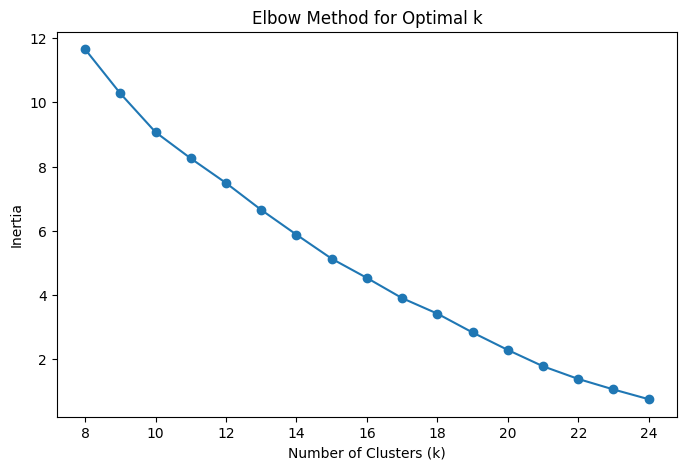

In [0]:
import numpy as np
import matplotlib.pyplot as plt

inertia = []
K_range = range(8, 25)  # Trying k from 1 to 10

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  embeddings = model.encode(final_df[final_df["BU"]=="Freshservice"]["Cluster"].tolist(), normalize_embeddings=True)

  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  # labels = kmeans.fit_predict(embeddings)
  kmeans.fit(embeddings)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [0]:
# embeddings

In [0]:
num_clusters = 20  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

In [0]:
labels = kmeans.fit_predict(embeddings)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e8c9d6ac0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

In [0]:
unique_clusters = list(set(labels))

In [0]:
unique_clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [0]:
df["Cluster_tag"] = labels

In [0]:
final_cluster_tag = {}
for i in unique_clusters:
  final_cluster_tag[i] = df[df["Cluster_tag"]==i]["Cluster"].tolist()[0]
  print(df[df["Cluster_tag"]==i]["Cluster"].tolist())
  print("*********")

['Dashboard and analytics customization', 'Dashboard and analytics customization']
*********
['General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries', 'General support and configuration queries']
*********
['Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Mi

In [0]:
df["Final_Cluster"] = df["Cluster_tag"].apply(lambda x: final_cluster_tag[x])

In [0]:
df.columns

Index(['Ticket ID', 'Subject', 'Description', 'Status', 'Created Time',
       'Priority', 'Source', 'BU', 'Category', 'Sub-Category', 'Item',
       'Full name', 'Email', 'CXG Segment', 'Region', 'Total MRR',
       'Freshservice MRR', 'Freshdesk MRR', 'Freshsales MRR', 'Company Name',
       'Company Domains', 'text_2_cluster', 'formatted_text', 'Cluster',
       'Cluster_tag', 'Final_Cluster'],
      dtype='object')

In [0]:
final_df[['formatted_text', 'Cluster', "BU",
       'Cluster_tag', 'Final_Cluster']].display()

formatted_text Cluster BU Cluster_tag Final_Cluster **Subject:** Conversation with Alfred Riley - Disable email notifications for a specific requester group

**Description:**

**Alfred Riley:** How can I suppress notifications mails to external Clients? 
*09:01 PM, 06th Jan*

**Mercy:** Hi Alfred! I'm Mercy Bernadette, How may I assist you today? 
*09:02 PM, 06th Jan*

**Alfred Riley:** How can I disable notifications for certain mails, mainly from external mail systems? 
*09:02 PM, 06th Jan*

**Mercy:** You can disable notifications for emails within a workspace based on the available options in the list. 
*09:04 PM, 06th Jan*

**Mercy:** Admin > Workspace > Email notifications 
*09:04 PM, 06th Jan*

**Alfred Riley:** I know this - I want to disable the notification only for certain requester groups, e.g., automated Amazon Mailboxes. 
*09:06 PM, 06th Jan*

**Mercy:** Unfortunately, this is not possible at the moment, but let me take this up with the backend team to hear if they have an alternative solution. 
*09:08 PM, 06th Jan*

**Alfred Riley:** This would be awesome - thanks. 
*09:09 PM, 06th Jan*

**Mercy:** Most probably, they would consider this as a Feature Enhancement Request. But I will convert this chat into a ticket and keep you updated. 
*09:09 PM, 06th Jan*

**Mercy:** Is there anything else that I can assist you with? 
*09:10 PM, 06th Jan*

**Alfred Riley:** Thank you, so far that's all. 
*09:10 PM, 06th Jan* Email and notification management Freshservice 2 Email and notification management **Subject:** Re: The Root Group <> Freshworks Connect

---

**From:** Sreyaas Chandrasekar 
**Date:** Tue, Jan 7, 2025 
**To:** Steve Farr , Himanshu Singh 
**Cc:** Mohamed Fehmaan 

Thanks, @Mohamed Fehmaan for looping me in!

Hi Steve!

It's great to e-meet you, and I'll take this opportunity to introduce myself! I'll be the primary point of contact for anything you need with Freshworks. Please save my email address and reach out if you have any questions.

I read through Fehmaan's email, and it looks like all the questions could be answered by our Support team. I'll loop in the @Himanshu Singh to this email thread to sort these out for us.

@Himanshu Singh, can you help Steve with the questions below?

1. Custom Mail Servers
2. Not able to populate the Change management tile while doing portal customizations.
3. Cloning Portals - Good to have feature.

Please schedule a call if necessary, and we will close these topics soon.

Thanks for the help in advance!

Regards, 
Sreyaas Chandrasekar 
Specialist - Customer Success, Freshworks 
sreyaas.chandrasekar@freshworks.com 
www.freshworks.com 

---

**From:** Steve Farr 
**Date:** Tue, Jan 7, 2025 
**To:** Mohamed Fehmaan 

Sounds good, thank you Mohamed!

Sincerely, 
Steve Farr 
Senior Systems Engineer 
The Root Group 
303-544-5281 
sfarr@rootgroup.com 

---

**From:** Mohamed Fehmaan 
**Date:** Mon, Jan 6, 2025 
**To:** Steve Farr , Sreyaas Chandrasekar 
**Subject:** The Root Group <> Freshworks Connect 

Hi Steve,

Thanks a lot for your time on the call today! I understand there are a couple of things that are pending from our side and listing the same below:

1. Custom Mail Servers
2. Not able to populate the Change management tile while doing portal customizations.
3. Cloning Portals - Good to have feature.

To address these issues and to have you helped out, I'm looping @Sreyaas Chandrasekar your dedicated Success Manager. He will help you as soon as he can.

Let me know if you have any questions or concerns and I'll be more than happy to help.

Best, 
Mohamed Fehmaan 
Senior Account Manager 
Freshworks Inc. 
p: +1 7198385950 || Book a meeting with me 
e: mohamed.fehmaan@freshworks.com 

---

*The content of this e-mail is confidential and is intended solely for the use of the individual or entity to whom it is addressed. If you have received this e-mail by mistake, please reply to this e-mail and follow with its deletion. If you are not the intended recipient, please note

In [0]:
final_df.to_excel("Customer_Request_Cluster_200_points_v3.xlsx", index=False)

In [0]:
# df["cluster"] = labels

In [0]:
# df["cluster"].unique()

array([5, 8, 7, 4, 1, 3, 2, 9, 6, 0], dtype=int32)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [0]:
# df[df["cluster"]==5].display()

Ticket ID Subject Description FS Category FS Sub-Category FS Item Theme text_2_cluster cluster 17287912 FS FRequest - Expose Search Bar in the Agent Group Feature description: A search bar to be exposed in the Agent Group Page, now that we have changed the UI to a paged format. Use case: Customer has over 200 Agent Groups, so the previous UI version was convenient for them as they could simply CTRL+F on their browser to search for the required group. Since we have changed to a paged format, it has decreased their efficiency. Exposing a search bar would make things better again. Importance(Good to haves / Must have / Deal breaker(or) churn) : Must Have Category:  User Management - Enhancements - Other Enhancements _____________ Company Information Requester Name:  Rafeal Wilkins Account ID: 540677 Company Name: Fairfax County Public Schools MRR: $38504 Plan: Enterprise Agent count: 500 Company URL: User Management Enhancements Enhancements null Subject: FS FRequest - Expose Search Bar in the Agent Group
Description: Feature description: A search bar to be exposed in the Agent Group Page, now that we have changed the UI to a paged format. Use case: Customer has over 200 Agent Groups, so the previous UI version was convenient for them as they could simply CTRL+F on their browser to search for the required group. Since we have changed to a paged format, it has decreased their efficiency. Exposing a search bar would make things better again. Importance(Good to haves / Must have / Deal breaker(or) churn) : Must Have Category:  User Management - Enhancements - Other Enhancements _____________ Company Information Requester Name:  Rafeal Wilkins Account ID: 540677 Company Name: Fairfax County Public Schools MRR: $38504 Plan: Enterprise Agent count: 500 Company URL: 5 17292608 FS Request - Analytics - Grand total in the Summary table Feature description: FS Request - Analytics - Grand total in the Summary table Use case: Abilitiy to have the Grand total for each column in the summary table as shown in the below screenshot. Importance: Good to have. Category: Analytics - Enhancements - Other Enhancements Company Information: toyotaastramotor.myfreshworks.com Requester Name: ferryanto.l@weefer.co.id Account ID: 616726 Company Name: Town of Port Hedland MRR: 2907.0 Plan: Pro Agent count: 51 Company URL: toyotaastramotor.freshservice.com Agent information Analytics Enhancements null null Subject: FS Request - Analytics - Grand total in the Summary table
Description: Feature description: FS Request - Analytics - Grand total in the Summary table Use case: Abilitiy to have the Grand total for each column in the summary table as shown in the below screenshot. Importance: Good to have. Category: Analytics - Enhancements - Other Enhancements Company Information: toyotaastramotor.myfreshworks.com Requester Name: ferryanto.l@weefer.co.id Account ID: 616726 Company Name: Town of Port Hedland MRR: 2907.0 Plan: Pro Agent count: 51 Company URL: toyotaastramotor.freshservice.com Agent information 5 17301234 FS FRequest: Agent role - Granularly adjust to only allow viewing agent groups without editing access Feature description: Agent role - Granularly adjust to only allow viewing agent groups without editing access Use case:  The cx wants a way to give agents access to see which groups agents are in without giving them access to modify the agents or groups Importance(Good to haves / Must have / Deal breaker(or) churn) : Must have Category:  -  -    _____________ Company Information Requester Name: steve.leso@taylormadegolf.com - Steve Leso Account ID:freshservice - 245510 Company Name: TaylorMadeGolf MRR: 6005 Plan: Pro Agent count: 249 Company URL: tmgolf.freshservice.com Agent information:  Agent Name: Kalhara P https://support.freshdesk.com/helpdesk/tickets/17299127 User Management Groups null null Subject: FS FRequest: Agent role - Granularly adjust to only allow viewing agent groups without editing access
Description: Feature description: Agent rol